In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [31]:
# import dataset
data = pd.read_csv('/Users/zhangweichen/OneDrive - UTS/Machine_Learning_Project/Project_without_framework/Logistic_Regression/mushrooms.csv')

# data preprocess
def map_value(dataset):
    encoder = LabelEncoder()
    for col in data.columns:
        data[col]=encoder.fit_transform(data[col])
    return dataset

data_new = map_value(data)
simple_x=data_new.iloc[:,1:23].values
simple_y=data_new[['class']].values
simple_x = np.concatenate((np.ones((simple_x.shape[0],1)),simple_x),axis=1)
theta_init = np.zeros([simple_x.shape[1],1])
simple_x_train, simple_x_valid, simple_y_train, simple_y_valid = train_test_split(simple_x, simple_y)
sample_size = simple_x_train.shape[0]

In [32]:
# build model
class LogisticRegressionModel:
    def __init__(self,theta):
        self.final_theta = np.zeros([theta.shape[0],1])
        self.final_cost = None

    def sigmoid(self,z):
        """sigmoid function"""
        return 1 / (1 + np.exp(-z))

    def model(self,x,theta):
        """activate by sigmoid function"""
        s1 = np.dot(x,theta)
        s = self.sigmoid(s1)
        return s

    def cost(self,x, y, theta, m):
        """cost function"""
        a = np.multiply(-y, np.log(self.model(x, theta)))
        b = np.multiply(1 - y, np.log(1 - self.model(x, theta)))
        s = np.sum(a - b) / m
        return s

    def gradient(self,x,y,theta):
        """calculate grad"""
        grad = -(x.T.dot(y-self.model(x,theta)))
        return grad

    def descent(self,x,y,n,m,alpha,theta):
        """gradient decent"""
        i = 0
        costs = [self.cost(x,y,theta,m)]
        while True:
            grad = self.gradient(x,y,theta)
            theta = theta - (alpha/m) * grad
            costs.append(self.cost(x,y,theta,m))
            i += 1
            if i >= n:
                self.final_theta = theta
                self.final_cost = costs
                break
        plt.plot(range(0,len(costs)),costs)
        plt.show() # plot cost
        return

    def predict(self,x,theta):
        """predict"""
        p = self.model(x,theta)
        for i in range(len(p)):

            if p[i] >= 0.5:
                p[i] = 1
            else:
                p[i] = 0
        return p


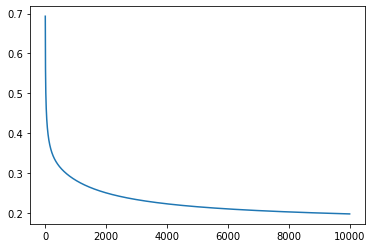

In [33]:
# training
myModel = LogisticRegressionModel(theta_init)
myModel.descent(simple_x_train,simple_y_train,10000,sample_size,0.03,theta_init)
theta_final = myModel.final_theta

In [34]:
# predict
predicted = myModel.predict(simple_x_valid,theta_final)
print(predicted)
print(simple_y_valid)
valid_corr_num = (predicted== simple_y_valid).sum()
accuracy = valid_corr_num/len(simple_y_valid)
print(accuracy)


[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
[[0]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]
0.9394387001477105
